# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [32]:
import numpy
import matplotlib.pyplot as plt
img = plt.imread('data/cells.png')

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

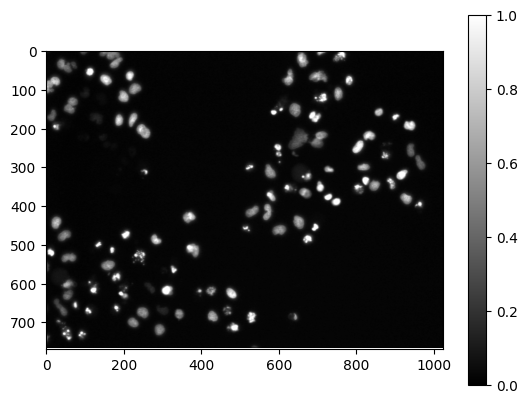

In [33]:
plt.figure()
plt.imshow(img, 'gray')
plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

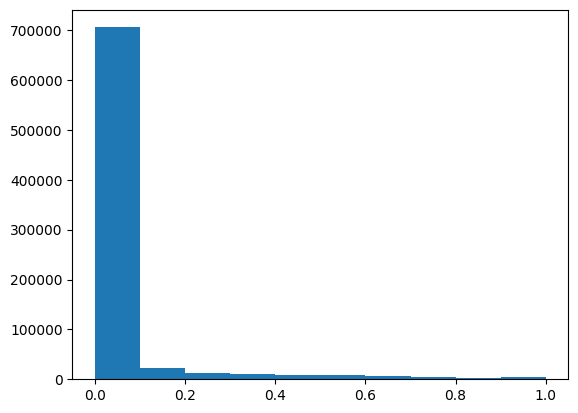

In [34]:
plt.hist(img.flatten())

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [35]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

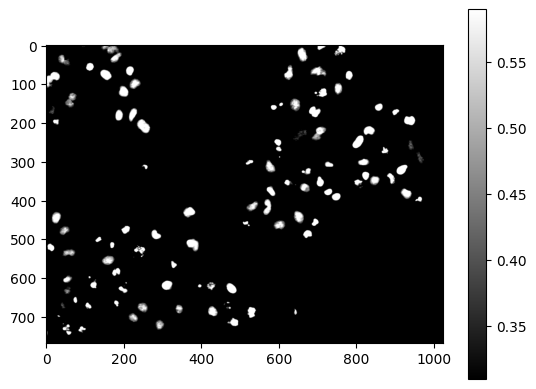

In [36]:
plt.imshow(img.clip(T1, T2), 'gray')
plt.colorbar()


### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

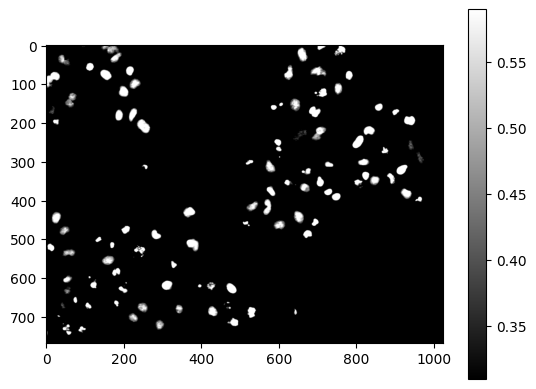

In [37]:
row = 0
col = 0
result = img.copy()
for row in range(0, img.shape[0]):
    for col in range(0, img.shape[1]):
        if img[row, col] < T1:
            result[row, col] = T1
        elif img[row, col] > T2:
            result[row, col] = T2
        else:
            result[row, col] = img [row, col]
        col +=1
    row += 1
plt.imshow(result, 'gray')
plt.colorbar()

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

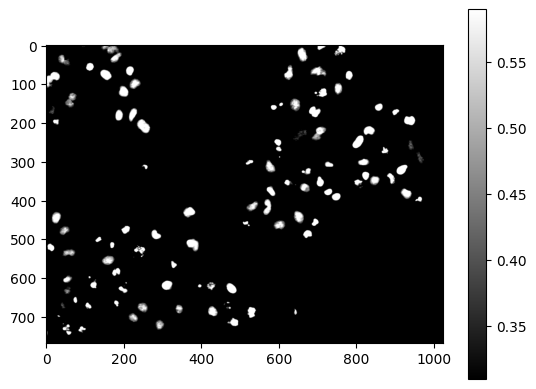

In [38]:
result = img.copy()
for [row, col] in numpy.ndindex(img.shape):
    if img[row, col] < T1:
        result[row, col] = T1
    elif img[row, col] > T2:
        result[row, col] = T2
    else:
        result[row, col] = img [row, col]
    col +=1
    row += 1
plt.imshow(result, 'gray')
plt.colorbar()
    

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [39]:
def clip_image(img, T1, T2):
    result = img.copy()
    row = 0
    col = 0
    for [row, col] in numpy.ndindex(img.shape):
        if img[row, col] < T1:
            result[row, col] = T1
        elif img[row, col] > T2:
            result[row, col] = T2
        else:
            result[row, col] = img [row, col]
        col +=1
        row += 1
    return result

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [40]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

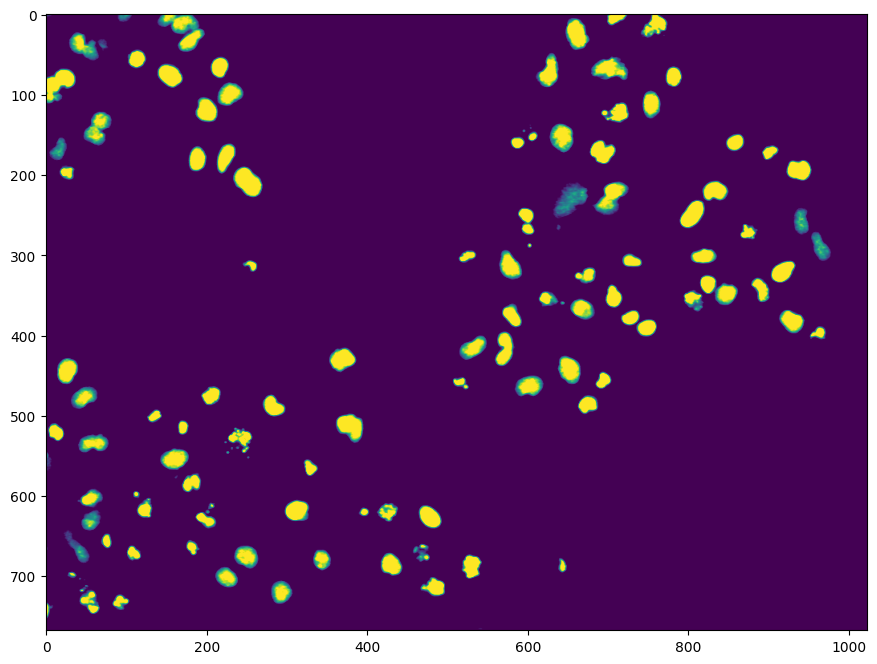

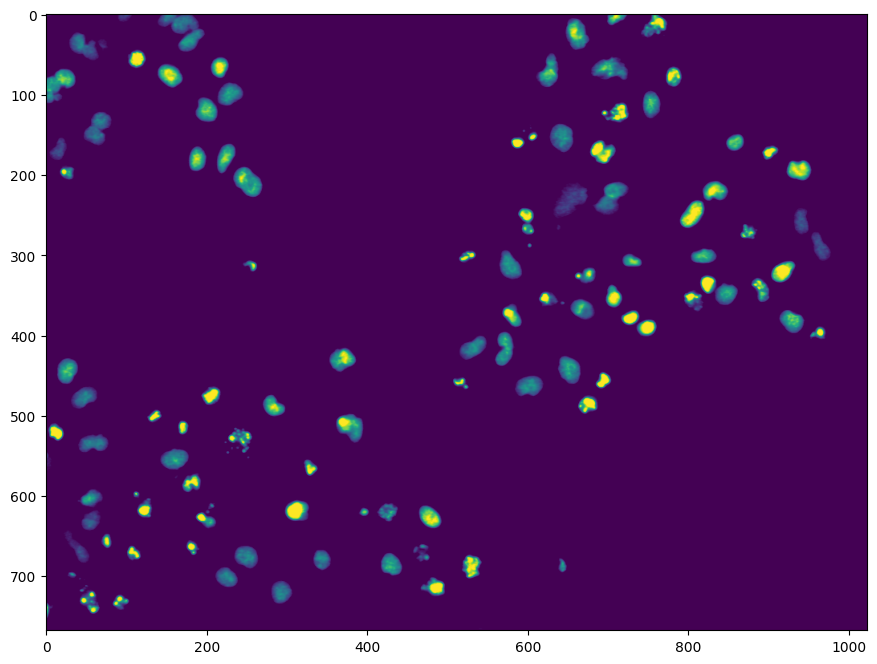

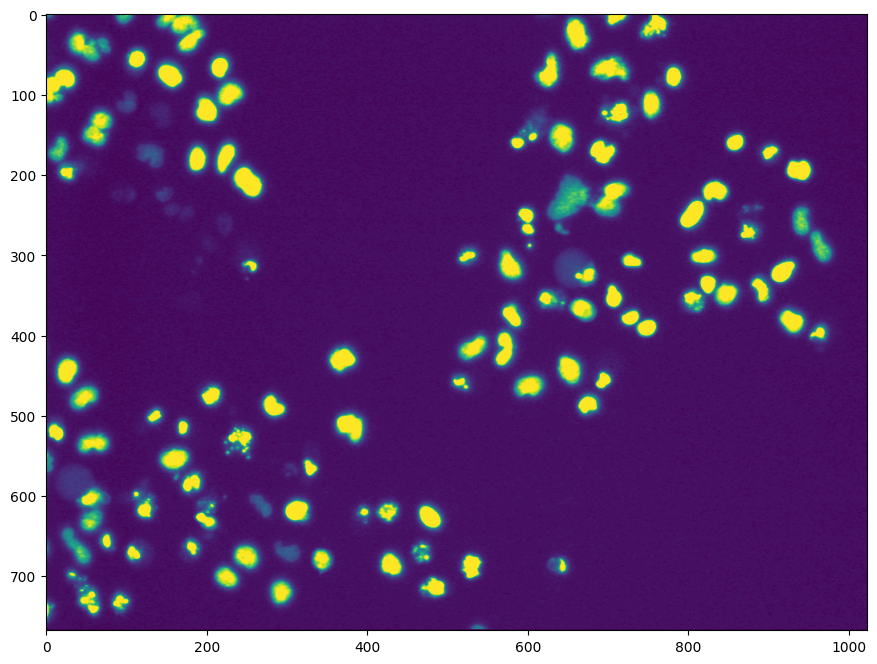

In [45]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.5))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 1))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0, 0.5))